### Bakery Sales EDA analysis

To be able to undestand the sales pattern of a bakery business , it helps business owner to better positision their business strategy. Bakery Owner now can make data-driven decision based on their history sales data. The sales EDA analysis will benefit marketing team in formulate more effective marketing strategy. 

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [2]:
!pip install seaborn --upgrade

In [3]:
# to read the csv file from local 

df=pd.read_csv(r"C:\Users\User\Desktop\bakery_sales_data.csv")

In [4]:
# read the top 10 rows from the df

df.head(10)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,1/2/2021,8:38,150040,BAGUETTE,1,"0,90 €"
1,1,1/2/2021,8:38,150040,PAIN AU CHOCOLAT,3,"1,20 €"
2,4,1/2/2021,9:14,150041,PAIN AU CHOCOLAT,2,"1,20 €"
3,5,1/2/2021,9:14,150041,PAIN,1,"1,15 €"
4,8,1/2/2021,9:25,150042,TRADITIONAL BAGUETTE,5,"1,20 €"
5,11,1/2/2021,9:25,150043,BAGUETTE,2,"0,90 €"
6,12,1/2/2021,9:25,150043,CROISSANT,3,"1,10 €"
7,15,1/2/2021,9:27,150044,BANETTE,1,"1,05 €"
8,18,1/2/2021,9:32,150045,TRADITIONAL BAGUETTE,3,"1,20 €"
9,19,1/2/2021,9:32,150045,CROISSANT,6,"1,10 €"


In [5]:
# understand the shape of the df
# column data type and value in each columns 

df.shape

(234005, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     234005 non-null  int64 
 1   date           234005 non-null  object
 2   time           234005 non-null  object
 3   ticket_number  234005 non-null  int64 
 4   article        234005 non-null  object
 5   Quantity       234005 non-null  int64 
 6   unit_price     234005 non-null  object
dtypes: int64(3), object(4)
memory usage: 12.5+ MB


From the info , the total rows of the dataset = 234,005 and 7 colums that include the date , time , ticket number , article , quantity and unit price

In [7]:
# to change the strings into capitalize on each word)

df["article"]=df["article"].str.title()

In [8]:
# to see what are the unique items sold in the bakery
sales_items=df["article"].unique()
number_items=df["article"].nunique()

print(f"Unique sales items:", sales_items)
print(f"Total Unique sales items:", number_items)

Unique sales items: ['Baguette' 'Pain Au Chocolat' 'Pain' 'Traditional Baguette' 'Croissant'
 'Banette' 'Banettine' 'Special Bread' 'Coupe' 'Sand Jb Emmental'
 'Kouign Amann' 'Boule 200G' 'Boule 400G' 'Gal Frangipane 6P' 'Campagne'
 'Moisson' 'Cafe Ou Eau' 'Brioche' 'Cereal Baguette' 'Seigle' 'Complet'
 'Divers Patisserie' 'Gal Frangipane 4P' 'Cookie' 'Ficelle'
 'Pain Aux Raisins' 'Gal Pomme 6P' 'Gal Pomme 4P' 'Financier X5'
 'Vik Bread' 'Divers Viennoiserie' 'Gache' 'Sandwich Complet'
 'Pain Banette' 'Grand Far Breton' 'Quim Bread' 'Special Bread Kg'
 'Gd Kouign Amann' 'Boule Polka' 'Demi Baguette' 'Chausson Aux Pommes'
 'Baguette Graine' 'Divers Confiserie' 'Sucette' 'Divers Boulangerie'
 'Boisson 33Cl' 'Pates' 'Formule Sandwich' 'Divers Sandwichs'
 'Croissant Amandes' 'Pain Choco Amandes' 'Sachet Viennoiserie' 'Nantais'
 'Chocolat' 'Pain S/Sel' 'Fondant Chocolat' 'Gal Poire Choco 6P'
 'Gal Poire Choco 4P' 'Galette 8 Pers' 'Sand Jb' 'Sachet De Crouton'
 'Grande Sucette' 'Demi Pain' '

In [9]:
# to see the start date and the end date of this dataset

start=df["date"].min()
end=df["date"].max()
print(f"The dataset start from"," ", start,"and end at"," ", end)

The dataset start from   1/10/2021 and end at   9/9/2022


In [10]:
#rename the columns to avoid confusion

df= df.rename(columns={"date":"Date","time":"Time","ticket_number":"Transaction ID","article":"Item","unit_price":"Price"})
df.head(10)

,Unnamed: 0,Date,Time,Transaction ID,Item,Quantity,Price
0,0,1/2/2021,8:38,150040,Baguette,1,"0,90 €"
1,1,1/2/2021,8:38,150040,Pain Au Chocolat,3,"1,20 €"
2,4,1/2/2021,9:14,150041,Pain Au Chocolat,2,"1,20 €"
3,5,1/2/2021,9:14,150041,Pain,1,"1,15 €"
4,8,1/2/2021,9:25,150042,Traditional Baguette,5,"1,20 €"
5,11,1/2/2021,9:25,150043,Baguette,2,"0,90 €"
6,12,1/2/2021,9:25,150043,Croissant,3,"1,10 €"
7,15,1/2/2021,9:27,150044,Banette,1,"1,05 €"
8,18,1/2/2021,9:32,150045,Traditional Baguette,3,"1,20 €"
9,19,1/2/2021,9:32,150045,Croissant,6,"1,10 €"


In [11]:
#change the format of Price column to $ amount
# remove the euro sign and use . instead of , for the price
df=df.replace(to_replace={'Price':{"€":" ",",":"."}},regex=True)
df.head(10)

,Unnamed: 0,Date,Time,Transaction ID,Item,Quantity,Price
0,0,1/2/2021,8:38,150040,Baguette,1,0.90
1,1,1/2/2021,8:38,150040,Pain Au Chocolat,3,1.20
2,4,1/2/2021,9:14,150041,Pain Au Chocolat,2,1.20
3,5,1/2/2021,9:14,150041,Pain,1,1.15
4,8,1/2/2021,9:25,150042,Traditional Baguette,5,1.20
5,11,1/2/2021,9:25,150043,Baguette,2,0.90
6,12,1/2/2021,9:25,150043,Croissant,3,1.10
7,15,1/2/2021,9:27,150044,Banette,1,1.05
8,18,1/2/2021,9:32,150045,Traditional Baguette,3,1.20
9,19,1/2/2021,9:32,150045,Croissant,6,1.10


In [12]:
# convert the columns data type accordingly 
#the date colums is not datetime format ,we have to convert it

df["Date"]=pd.to_datetime(df["Date"])
df["Price"]=pd.to_numeric(df["Price"])
df["Transaction ID "]=df["Transaction ID"].astype("int")
df["Quantity "]=df["Quantity"].astype("int")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       234005 non-null  int64         
 1   Date             234005 non-null  datetime64[ns]
 2   Time             234005 non-null  object        
 3   Transaction ID   234005 non-null  int64         
 4   Item             234005 non-null  object        
 5   Quantity         234005 non-null  int64         
 6   Price            234005 non-null  float64       
 7   Transaction ID   234005 non-null  int32         
 8   Quantity         234005 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(2)
memory usage: 14.3+ MB


In [13]:
#to check for missing value and duplicate 

df.isnull().sum()


Unnamed: 0         0
Date               0
Time               0
Transaction ID     0
Item               0
Quantity           0
Price              0
Transaction ID     0
Quantity           0
dtype: int64

In [14]:
df.duplicated().sum()
df.shape

(234005, 9)

There is no duplicated value or nan value in the dataset. We convert some of the columns data into the data type that we want and change the name of the columns for easy understanding of the dataset 

In [15]:
# split the date columns into weekday , month , year and day

df["Weekday"]=df["Date"].dt.day_name()
df['Month'] = df['Date'].dt.to_period('M')
df["Day"]=df["Date"].dt.day
df["Year"]=df["Date"].dt.year

df.head(10)

,Unnamed: 0,Date,Time,Transaction ID,Item,Quantity,Price,Transaction ID,Quantity,Weekday,Month,Day,Year
0,0,2021-01-02,8:38,150040,Baguette,1,0.90,150040,1,Saturday,2021-01,2,2021
1,1,2021-01-02,8:38,150040,Pain Au Chocolat,3,1.20,150040,3,Saturday,2021-01,2,2021
2,4,2021-01-02,9:14,150041,Pain Au Chocolat,2,1.20,150041,2,Saturday,2021-01,2,2021
3,5,2021-01-02,9:14,150041,Pain,1,1.15,150041,1,Saturday,2021-01,2,2021
4,8,2021-01-02,9:25,150042,Traditional Baguette,5,1.20,150042,5,Saturday,2021-01,2,2021
5,11,2021-01-02,9:25,150043,Baguette,2,0.90,150043,2,Saturday,2021-01,2,2021
6,12,2021-01-02,9:25,150043,Croissant,3,1.10,150043,3,Saturday,2021-01,2,2021
7,15,2021-01-02,9:27,150044,Banette,1,1.05,150044,1,Saturday,2021-01,2,2021
8,18,2021-01-02,9:32,150045,Traditional Baguette,3,1.20,150045,3,Saturday,2021-01,2,2021
9,19,2021-01-02,9:32,150045,Croissant,6,1.10,150045,6,Saturday,2021-01,2,2021


In [16]:
# breakdown the Time column to hour 

df["Hour"]=pd.to_datetime(df["Time"],format='%H:%M').dt.hour

In [17]:
# sumarize the revenue for each transaction 

df["Revenue"]=df["Quantity"]*df["Price"]
df.head()

,Unnamed: 0,Date,Time,Transaction ID,Item,Quantity,Price,Transaction ID,Quantity,Weekday,Month,Day,Year,Hour,Revenue
0,0,2021-01-02,8:38,150040,Baguette,1,0.90,150040,1,Saturday,2021-01,2,2021,8,0.90
1,1,2021-01-02,8:38,150040,Pain Au Chocolat,3,1.20,150040,3,Saturday,2021-01,2,2021,8,3.60
2,4,2021-01-02,9:14,150041,Pain Au Chocolat,2,1.20,150041,2,Saturday,2021-01,2,2021,9,2.40
3,5,2021-01-02,9:14,150041,Pain,1,1.15,150041,1,Saturday,2021-01,2,2021,9,1.15
4,8,2021-01-02,9:25,150042,Traditional Baguette,5,1.20,150042,5,Saturday,2021-01,2,2021,9,6.00


In [18]:
# Drop '.' values and 0 values in 'Price'
df = df[~df['Item'].isin(['.'])].reset_index(drop = True)
df = df[~df['Price'].isin([0])].reset_index(drop = True)
df.shape


(233973, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233973 entries, 0 to 233972
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       233973 non-null  int64         
 1   Date             233973 non-null  datetime64[ns]
 2   Time             233973 non-null  object        
 3   Transaction ID   233973 non-null  int64         
 4   Item             233973 non-null  object        
 5   Quantity         233973 non-null  int64         
 6   Price            233973 non-null  float64       
 7   Transaction ID   233973 non-null  int32         
 8   Quantity         233973 non-null  int32         
 9   Weekday          233973 non-null  object        
 10  Month            233973 non-null  period[M]     
 11  Day              233973 non-null  int32         
 12  Year             233973 non-null  int32         
 13  Hour             233973 non-null  int32         
 14  Revenue          233

### EDA analysis

In [20]:
# group the data by item and sum the quantity to see the most sold item 

most_item_sold=df.groupby("Item")["Quantity"].sum()
df_most_item_sold=pd.DataFrame(most_item_sold)
df_most_item_sold.reset_index(inplace=True)
sorted_df =df_most_item_sold.sort_values(by="Quantity", ascending=False)
top_ten=sorted_df.head(10)

top_ten

,Item,Quantity
138,Traditional Baguette,117463
30,Croissant,29654
83,Pain Au Chocolat,25236
29,Coupe,23505
5,Banette,22732
2,Baguette,22053
23,Cereal Baguette,7427
124,Special Bread,5456
55,Formule Sandwich,5181
133,Tartelette,5020


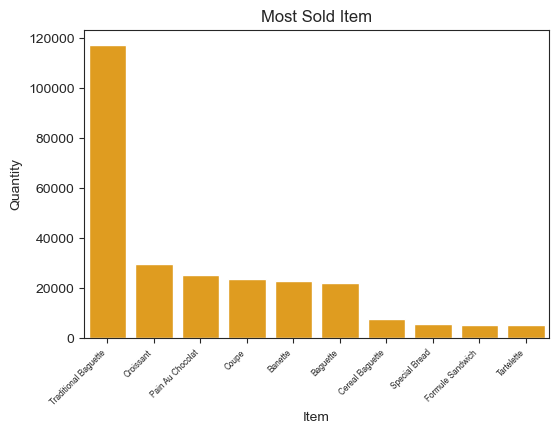

In [44]:
sns.set_style("ticks")

plt.figure(figsize=(6,4))

sns.barplot(x="Item",y="Quantity",data=top_ten, color="orange")
plt.title("Most Sold Item")
plt.xticks(rotation=45,ha="right", fontsize=6)
plt.show()


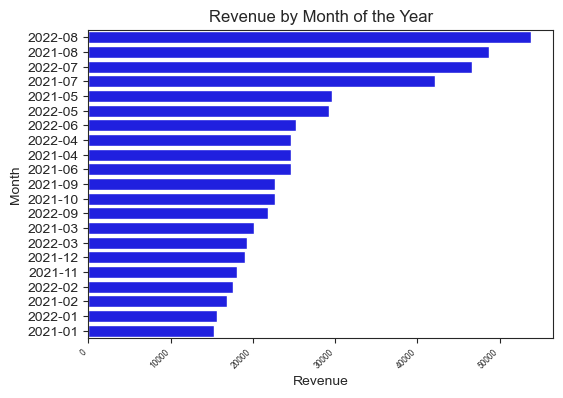

In [46]:
# total revenue by month

month_revenue=df.groupby("Month")["Revenue"].sum().reset_index().sort_values(by="Revenue", ascending=False)
sns.set_style("ticks")
color=sns.color_palette("tab20b")
plt.figure(figsize=(6,4))

ax=sns.barplot(x="Revenue",y="Month",data=month_revenue,orient="h",color="blue")
plt.title("Revenue by Month of the Year")
plt.xticks(rotation=45,ha="right", fontsize=6)
plt.show()

for i in ax.containers:
    ax.bar_label(i, padding=-57, color='black', 
             fontsize=12, label_type='edge',
            fontweight='bold')


We have the top 10 most-sold-items from the bakery and the revenue made by month and years during the record period. The no.1 sold -Traditional baguette from the bakery , shows that the local is very much depending on this kind of pastry for daily energy provider. Comparing to other different flavored pastries , plain traditional baguette allows it to be taken with other jams or filling. This bakery recorded a better revenue during the second half of the year , for both 2021 and 2022, in which August being the best month while january being the worst month.

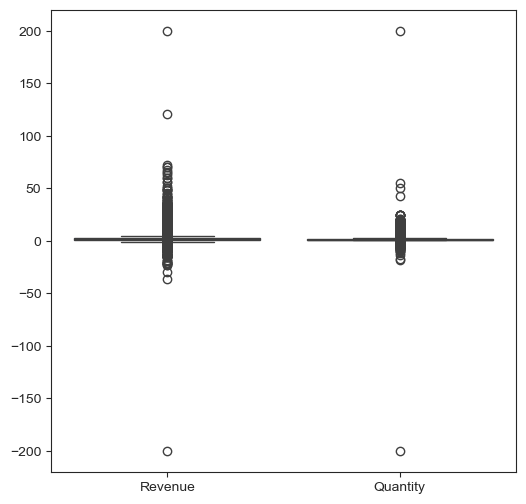

In [23]:
# check for any outlier in the dataset
outliers=pd.DataFrame(data=df,columns=["Revenue","Quantity"])
plt.figure(figsize=(6,6))
sns.boxplot(outliers)
plt.show()

In [24]:
# drop those negative value which does not make sense to the dataset

quant_outlier =df.loc[(df["Quantity"]>=100) | (df["Quantity"]<=0)]
rev_outlier =df.loc[(df["Revenue"]>=100) | (df["Revenue"]<=0)]
quant_outlier

,Unnamed: 0,Date,Time,Transaction ID,Item,Quantity,Price,Transaction ID,Quantity,Weekday,Month,Day,Year,Hour,Revenue
447,898,2021-01-03,10:41,150265,Baguette,-1,0.90,150265,-1,Sunday,2021-01,3,2021,10,-0.90
1161,2558,2021-01-05,19:00,150738,Special Bread,-1,2.40,150738,-1,Tuesday,2021-01,5,2021,19,-2.40
1162,2559,2021-01-05,19:00,150738,Divers Patisserie,-1,6.00,150738,-1,Tuesday,2021-01,5,2021,19,-6.00
1163,2560,2021-01-05,19:00,150738,Divers Boulangerie,-1,2.00,150738,-1,Tuesday,2021-01,5,2021,19,-2.00
1466,3269,2021-01-08,11:58,150941,Coupe,-1,0.15,150941,-1,Friday,2021-01,8,2021,11,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233022,509243,2022-09-27,18:03,288312,Coupe,-2,0.15,288312,-2,Tuesday,2022-09,27,2022,18,-0.30
233023,509244,2022-09-27,18:03,288312,Traditional Baguette,-1,1.30,288312,-1,Tuesday,2022-09,27,2022,18,-1.30
233024,509245,2022-09-27,18:03,288312,Cereal Baguette,-3,1.35,288312,-3,Tuesday,2022-09,27,2022,18,-4.05
233521,510396,2022-09-29,11:55,288639,Boisson 33Cl,-1,1.50,288639,-1,Thursday,2022-09,29,2022,11,-1.50


In [25]:
rev_outlier

,Unnamed: 0,Date,Time,Transaction ID,Item,Quantity,Price,Transaction ID,Quantity,Weekday,Month,Day,Year,Hour,Revenue
447,898,2021-01-03,10:41,150265,Baguette,-1,0.90,150265,-1,Sunday,2021-01,3,2021,10,-0.90
1161,2558,2021-01-05,19:00,150738,Special Bread,-1,2.40,150738,-1,Tuesday,2021-01,5,2021,19,-2.40
1162,2559,2021-01-05,19:00,150738,Divers Patisserie,-1,6.00,150738,-1,Tuesday,2021-01,5,2021,19,-6.00
1163,2560,2021-01-05,19:00,150738,Divers Boulangerie,-1,2.00,150738,-1,Tuesday,2021-01,5,2021,19,-2.00
1466,3269,2021-01-08,11:58,150941,Coupe,-1,0.15,150941,-1,Friday,2021-01,8,2021,11,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233022,509243,2022-09-27,18:03,288312,Coupe,-2,0.15,288312,-2,Tuesday,2022-09,27,2022,18,-0.30
233023,509244,2022-09-27,18:03,288312,Traditional Baguette,-1,1.30,288312,-1,Tuesday,2022-09,27,2022,18,-1.30
233024,509245,2022-09-27,18:03,288312,Cereal Baguette,-3,1.35,288312,-3,Tuesday,2022-09,27,2022,18,-4.05
233521,510396,2022-09-29,11:55,288639,Boisson 33Cl,-1,1.50,288639,-1,Thursday,2022-09,29,2022,11,-1.50


negative quantity might due to error sales record and thus it should be removed to keep our data intact to its normal distribution. The outlier quantity of >=100 rarely happen as should be removed too to avoid distortion to the mean of the dataset 

In [26]:
#remove outlier 

cl_df=df.drop(df[df["Revenue"]<=0].index)
cl_df.shape

(232679, 15)

In [27]:
#to confirm all negative value has been removed 
cl_df.loc[cl_df["Quantity"]<=0]

,Unnamed: 0,Date,Time,Transaction ID,Item,Quantity,Price,Transaction ID,Quantity,Weekday,Month,Day,Year,Hour,Revenue


In [28]:
cl_df1=cl_df.drop(cl_df[cl_df["Revenue"]>=100].index)
cl_df1.shape

(232677, 15)

In [29]:
cl_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232677 entries, 0 to 233972
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       232677 non-null  int64         
 1   Date             232677 non-null  datetime64[ns]
 2   Time             232677 non-null  object        
 3   Transaction ID   232677 non-null  int64         
 4   Item             232677 non-null  object        
 5   Quantity         232677 non-null  int64         
 6   Price            232677 non-null  float64       
 7   Transaction ID   232677 non-null  int32         
 8   Quantity         232677 non-null  int32         
 9   Weekday          232677 non-null  object        
 10  Month            232677 non-null  period[M]     
 11  Day              232677 non-null  int32         
 12  Year             232677 non-null  int32         
 13  Hour             232677 non-null  int32         
 14  Revenue          232677 n

In [30]:
corr_df=cl_df1.loc[ : , ["Transaction ID","Quantity","Price","Day","Hour","Year","Revenue"]]
corr_df

,Transaction ID,Quantity,Price,Day,Hour,Year,Revenue
0,150040,1,0.90,2,8,2021,0.90
1,150040,3,1.20,2,8,2021,3.60
2,150041,2,1.20,2,9,2021,2.40
3,150041,1,1.15,2,9,2021,1.15
4,150042,5,1.20,2,9,2021,6.00
...,...,...,...,...,...,...,...
233968,288911,1,0.15,30,18,2022,0.15
233969,288911,1,1.20,30,18,2022,1.20
233970,288911,2,0.15,30,18,2022,0.30
233971,288912,1,1.30,30,18,2022,1.30


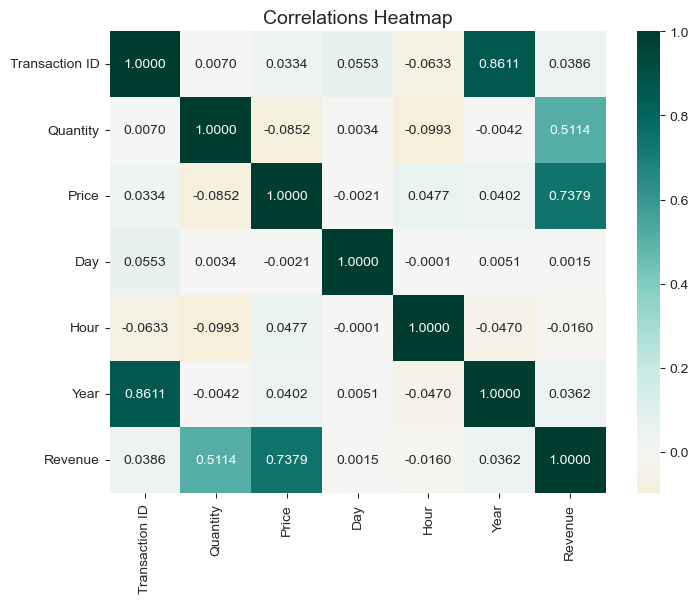

In [31]:
# plot correlations betwwen variable 
plt.figure(figsize=(8,6))
corr_matrix=corr_df.corr()
heatmap=sns.heatmap(corr_matrix,annot=corr_matrix, fmt=".4f",cmap="BrBG",center=0)
heatmap.set_title("Correlations Heatmap",fontdict={'fontsize':14})
plt.show()

From the Corr Heatmap, we could see some linear positive relationship between , Quantity , Price , and Revenue . However Corr did not tell us the causal relationhip between these variables , for example ( Transation Id and Year-0.8611). 

Quantity and Revenue - 0.5114, both has a medium positive relationship 
Prive and Revenue- 0.7378- it has to be positive related since with higher price , the bakery can generate higher revenue if quantity is not affected

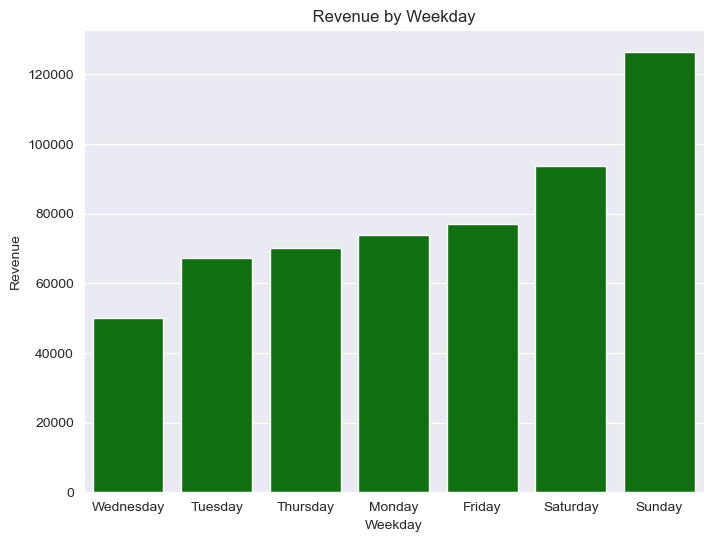

In [37]:
#revenue by weekday

rev_weekday=df.groupby("Weekday")["Revenue"].sum().reset_index().sort_values(by="Revenue")

plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
color=sns.color_palette("viridis")
sns.barplot(data=rev_weekday, x="Weekday", y="Revenue", color="green")
plt.title(" Revenue by Weekday ")
plt.show()

Weekend is as a whole generate better revenue compare to weekday, with Sunday recorded the highest among the weekdays. The bakery can look into stratery to boost the sales for middle of the week , ( Wed gives the lowest revenue) 

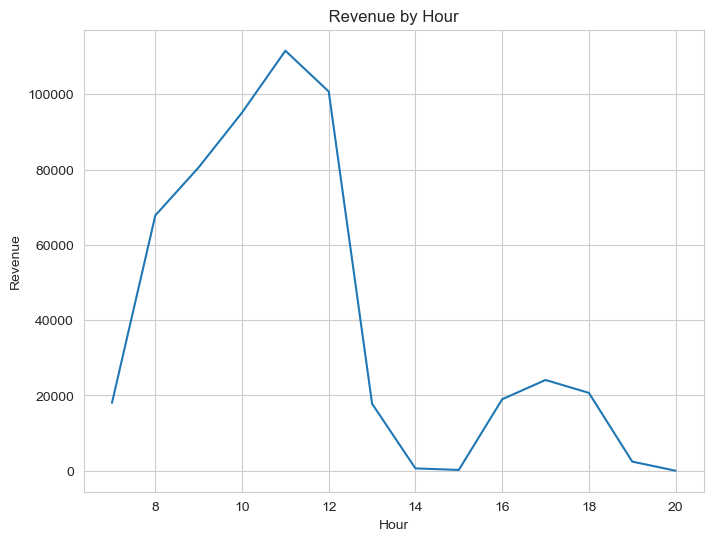

In [49]:
#revenue by weekday

rev_hour=df.groupby("Hour")["Revenue"].sum().reset_index().sort_values(by="Revenue")

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.lineplot(data=rev_hour,x="Hour", y="Revenue")
plt.title(" Revenue by Hour ")
plt.show()

It is interesting to see that most of the sales was done during the morning session from 8-11am , the sales peak at 11am , and slowly coming down after lunch hour. The sales improve slightly during 4pm-6pm and then slow down drastically . The hourly sales pattern could provide some hindsight to the bakery on adjusting their business hour.


In [78]:
#total revenu from dataset

total_sales=cl_df1["Revenue"].sum()

In [56]:
#revenue made after 19:00 hour 

evening_sales=cl_df1.groupby("Hour")["Revenue"].sum()
evening_sales

Hour
7      18151.25
8      68190.60
9      80946.35
10     95664.95
11    112293.96
12    101509.00
13     17938.27
14       630.40
15       214.60
16     19146.52
17     24333.55
18     20890.65
19      2477.45
20         8.15
Name: Revenue, dtype: float64

In [80]:
#calculate % of sales from 19hour onward / total sales

df2=pd.DataFrame(evening_sales)

sum_condition=df2.loc[[19,20],["Revenue"]].sum()
percentage=(sum_condition/total_sales)*100
print(f"Percentage of Sales after 7 pm ;" , percentage)
    

Percentage of Sales after 7 pm ; Revenue    0.441966
dtype: float64


As the percentage of sales after 7pm is of 0.44% of the total sales record , the bakery could consider to close the business by by 7 pm instead of open until so late. This can help them to save the man power and utility cost and make better use of it in boosting the sales during other time of the day. 

In [82]:
#percentage of sales from top 10 most sold items 

sales_top_ten=top_ten["Quantity"].sum()

sales_percent=(sales_top_ten/total_sales)*100

print(f"Percentage Sales for top ten items :", sales_percent)

Percentage Sales for top ten items : 46.893495096068484


From the calculation ,we also realized that the top 10 menu items constitutes 47% of the total sales (total unique menu item=149
) thus , it is worth to delve into those less sold item and decide whether to discontinue or improvise. The bakery can also design a package sale that tie up 2 or more menu item together, which can help to boost those less sold menu item